In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from utils import load_config, CdsERA5, WindSpeedVisualizer

In [17]:
config = load_config("config.yaml")
query = config["cds_request"]

In [18]:
cds = CdsERA5()
cds.get_data(query=query)
cds.download(filename="ERA5")
wind_speed, ds = cds.process()

2024-06-13 11:55:16.108 | INFO     | utils:__init__:103 - Successfully log to Climate Data Store
2024-06-13 11:55:16,229 INFO Welcome to the CDS
2024-06-13 11:55:16,231 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2024-06-13 11:55:16,333 INFO Request is queued
2024-06-13 11:55:17,361 INFO Request is running
2024-06-13 11:55:21,162 INFO Request is completed
2024-06-13 11:55:21,164 INFO Downloading https://download-0008-clone.copernicus-climate.eu/cache-compute-0008/cache/data6/adaptor.mars.internal-1718279716.6576905-21569-16-ba0c3f55-d2e6-4e83-b027-e5436e03e6be.grib to ERA5.grib (122.8M)
2024-06-13 11:55:24,650 INFO Download rate 35.2M/s 


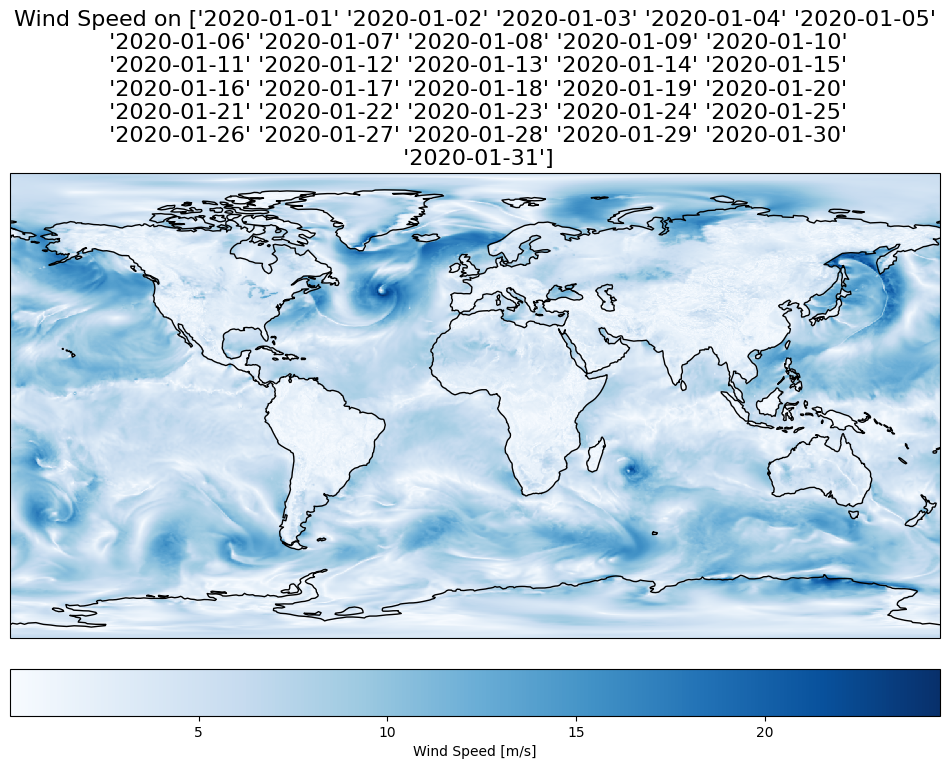

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
heatmap = ax.pcolormesh(wind_speed.longitude, wind_speed.latitude,
                        wind_speed.sel(time=wind_speed.time[0]),
                        cmap='Blues', transform=ccrs.PlateCarree(), shading='auto')

cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Wind Speed [m/s]')
plt.title(f'Wind Speed on {np.datetime_as_string(wind_speed.time.values, unit="D")}', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [20]:
wind_anim = WindSpeedVisualizer.generate_animation(wind_speed)

In [21]:
wind_anim

In [10]:
wind_speed.sel(time=wind_speed.time[0]).std()

<xarray.DataArray ()> Size: 4B
array(3.587037, dtype=float32)
Coordinates:
    number      int64 8B 0
    time        datetime64[ns] 8B 2020-01-01
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
    valid_time  datetime64[ns] 8B 2020-01-01

In [19]:
wind_speed

<xarray.DataArray (time: 24, latitude: 721, longitude: 1440)> Size: 100MB
array([[[0.77643126, 0.77643126, 0.77643126, ..., 0.77643126,
         0.77643126, 0.77643126],
        [5.2346234 , 5.2323513 , 5.2300935 , ..., 5.231471  ,
         5.232421  , 5.2341933 ],
        [4.6180863 , 4.6179547 , 4.6158834 , ..., 4.6099386 ,
         4.613364  , 4.6167064 ],
        ...,
        [3.917389  , 3.9169152 , 3.9164271 , ..., 3.9097073 ,
         3.9129143 , 3.915982  ],
        [4.308621  , 4.3079114 , 4.306306  , ..., 4.302526  ,
         4.304227  , 4.3059506 ],
        [0.22283965, 0.22283965, 0.22283965, ..., 0.22283965,
         0.22283965, 0.22283965]],

       [[0.76702505, 0.76702505, 0.76702505, ..., 0.76702505,
         0.76702505, 0.76702505],
        [4.754029  , 4.7512226 , 4.7484293 , ..., 4.7543774 ,
         4.754246  , 4.75413   ],
        [4.1576037 , 4.1563573 , 4.1529613 , ..., 4.1544013 ,
         4.1558905 , 4.1559505 ],
...
        [5.1264215 , 5.1271315 , 5.127964  , ..., 5.1064672 ,
         5.113746  , 5.1202083 ],
        [5.041552  , 5.0415287 , 5.0427504 , ..., 5.0290604 ,
         5.0335064 , 5.0370455 ],
        [0.42778608, 0.42778608, 0.42778608, ..., 0.42778608,
         0.42778608, 0.42778608]],

       [[0.33480212, 0.33480212, 0.33480212, ..., 0.33480212,
         0.33480212, 0.33480212],
        [6.4030504 , 6.4016137 , 6.400376  , ..., 6.394932  ,
         6.397543  , 6.4001956 ],
        [6.5273404 , 6.5262723 , 6.5240064 , ..., 6.517677  ,
         6.5216036 , 6.525207  ],
        ...,
        [5.416132  , 5.412628  , 5.4091315 , ..., 5.4043007 ,
         5.4098253 , 5.41444   ],
        [5.2246246 , 5.224223  , 5.22386   , ..., 5.2132516 ,
         5.21701   , 5.220801  ],
        [0.44104186, 0.44104186, 0.44104186, ..., 0.44104186,
         0.44104186, 0.44104186]]], dtype=float32)
Coordinates:
    number      int64 8B 0
  * time        (time) datetime64[ns] 192B 2020-01-01 ... 2020-01-01T23:00:00
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 192B 2020-01-01 ... 2020-01-01T23:00:00

In [47]:
regridded_dataset = ds.assign_coords(
                longitude=(((ds.longitude + 180) % 360) - 180)).sortby('longitude')

In [49]:
regridded_dataset.v10

<xarray.DataArray 'v10' (latitude: 721, longitude: 1440)> Size: 4MB
array([[-0.29097 , -0.29097 , -0.29097 , ..., -0.29097 , -0.29097 , -0.29097 ],
       [-2.458939, -2.476517, -2.494095, ..., -2.407181, -2.424759, -2.44136 ],
       [-1.929642, -1.963821, -1.998978, ..., -1.82515 , -1.860306, -1.894485],
       ...,
       [-1.870071, -1.840775, -1.810501, ..., -1.960892, -1.930618, -1.900345],
       [-1.923782, -1.908157, -1.893509, ..., -1.968704, -1.954056, -1.938431],
       [-0.047806, -0.047806, -0.047806, ..., -0.047806, -0.047806, -0.047806]],
      dtype=float32)
Coordinates:
    number      int64 8B ...
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
    valid_time  datetime64[ns] 8B ...
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Attributes: (12/30)
    GRIB_paramId:                             166
    GRIB_dataType:                            an
    GRIB_numberOfPoints:                      1038240
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    ...                                       ...
    GRIB_shortName:                           10v
    GRIB_totalNumber:                         0
    GRIB_units:                               m s**-1
    long_name:                                10 metre V wind component
    units:                                    m s**-1
    standard_name:                            unknown